# Домашнее задание 2, задача 1. Нахождение ранга корневого дерева

В этом задании требуется реализовать нахождение ранга корневого дерева с помощью поиска в глубину.

*Ранг* определяется для каждой вершины дерева. Для листьев ранг равен нулю. Для промежуточной вершины ранг равен максимуму среди рангов вершин ее потомков, если максимальный ранг среди потомков достигается на одном потомке, и ранг на 1 больше ранга потомков, если максимальный ранг среди потомков достигается сразу на двух потомках. Рангом дерева называется ранг ее корня.

Для примера, ранги вершин дерева на картинке ниже подписаны в самих вершинах. Ранг всего дерева равен 2.

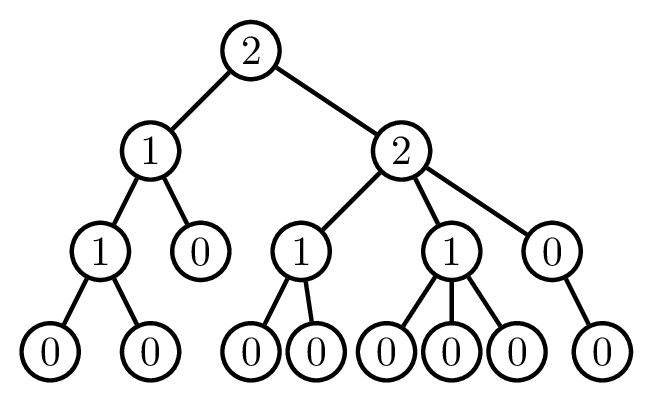


---
**Правила сдачи.** Это первая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **1 июня в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 2 июня. 

Также можно отправить решения до **19:00 30 мая**. Тогда они будут проверены до 19:00 31 мая и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

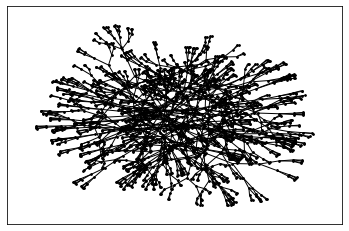

In [83]:
# Задаем граф

import networkx as nx
import matplotlib.pyplot as plt

# В этой строчке задается случайное дерево на 100 вершинах. При каждом перезапуске блока будет создаваться новое дерево.
#tree = nx.random_tree(100)

# В варианте в строчке ниже генерируется регулярное дерево ветвления 4 и глубины 4
tree = nx.generators.classic.balanced_tree(2, 10)

# В варианте в строчке ниже генерируется биномиальное дерево порядка 6
#tree = nx.binomial_tree(6)

#nx.draw_networkx(tree)

# Рисуем граф
def draw_G(G):
    options = {
        "node_size": 3,
        "node_color": "black",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }

    nx.draw_networkx(G, with_labels=False, **options)
    plt.show()
    
draw_G(tree)

In [84]:
# В этом блоке нужно реализовать подсчет ранга дерева с помощью поиска в глубину
# Мы считаем вершину с меткой 0 корнем дерева

# Заводим множество посещенных вершин
visited = {}
for v in tree:
    visited[v] = False

# В этой функции мы будем подсчитывать ранг дерева с корнем в вершине v
def count_rank(v):
    # Реализуйте здесь ваше решение
    rank = 0
    visited[v] = True
    list_ = [-1]
    for i, u in enumerate(tree[v]):
        if not visited[u]:
            # Собираем все ранги наследников для текущего предка
            rank = count_rank(u)  
            list_.append(rank)  
        # Если закончили с соседями текущей вершины, подводим итоги
        if i == len(tree[v])-1:
            # Ищем максимальный ранг наследников, если наследников с таким рангом
            # больше 2х, добавляем +1 к рангу предка
            if list_.count(max(list_)) > 1:
                rank +=1
            list_ = []

    return rank

print(f'Ранг дерева: {count_rank(0)}')

Ранг дерева: 10
